In [1]:
ls

README.md                 index.ipynb               static-images/
TODO                      output.demo/              tara-delmont.ipynb
TODO~                     output.gtdb-contam-dna/   tobg_np-110.contigs.json
Untitled.ipynb            output.ibd2/              tobg_np-110.fa
Untitled1.ipynb           output.tara-delmont/      tobg_np-110.k31.sig
__pycache__/              sankey-diagrams.html      tobg_np-110.sig
display-gather.ipynb      sankey-diagrams.pdf       tobg_np-110.sig.matches
environment.yml           sourmash_sankey.py        xxx.lca.json
images/                   sourmash_sankey.py~


In [9]:
from charcoal import utils
import sourmash
from sourmash.lca import taxlist, LineagePair
import collections

import plotly.graph_objects as go

import sourmash_sankey
import importlib

import os.path

import screed

from sourmash.lca.command_index import load_taxonomy_assignments
from sourmash.lca import LCA_Database

from charcoal.lineage_db import LineageDB
from charcoal.utils import (gather_at_rank, get_ident, ContigGatherInfo)

import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

[      0.  500000. 1000000. 1500000. 2000000. 2500000. 3000000. 3500000.
 4000000. 4500000.]
['0kb', '500kb', '1000kb', '1500kb', '2000kb', '2500kb', '3000kb', '3500kb', '4000kb', '4500kb']


<Figure size 640x480 with 0 Axes>

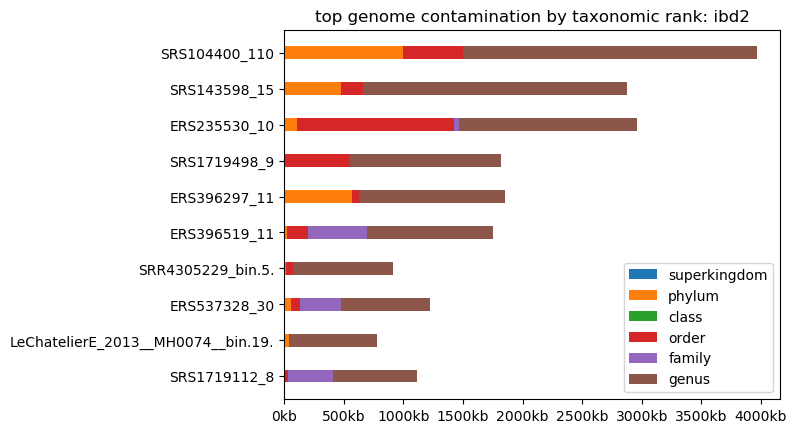

In [56]:
def plot_hitlist(hit_list_filename, omit_genus=True, num=10):
    hits = utils.HitList(hit_list_filename)
    
    endings = '.fna.gz', 'fa.gz', '.fa', '_genomic'
    
    if omit_genus:
        sort_by = 'family_bad_bp'
    else:
        sort_by = 'genus_bad_bp'

    names = []
    superks = []
    phylums = []
    classes = []
    orders = []
    families = []
    genuses = []
    for name, row in sorted(hits.rows.items(), key=lambda x: -int(x[1][sort_by])):
        for end in endings:
            if name.endswith(end): name = name[:-len(end)]
        names.append(name)

        for k in row:
            if k.endswith('bad_bp'):
                row[k] = int(row[k])

        superks.append(row['superkingdom_bad_bp'])
        phylums.append(row['phylum_bad_bp'])
        classes.append(row['class_bad_bp'])
        orders.append(row['order_bad_bp'])
        families.append(row['family_bad_bp'])
        genuses.append(row['genus_bad_bp'])


        if len(names) == num:
            break

    plt.rcdefaults()
    plt.set_cmap('jet')
    fig, ax = plt.subplots()

    N = len(names)
    ind = np.arange(N)
    width = 0.35

    p1 = ax.barh(ind, superks, width)
    color_names = ['superkingdom']
    color_handles = [p1]
    last_y = superks

    for y, name in (phylums, 'phylum'), (classes, 'class'), (orders, 'order'), (families, 'family'), (genuses, 'genus'):
        if omit_genus and name == 'genus': break
        p2 = ax.barh(ind, y, width, left=last_y)
        plt.legend(p2, [name])
        color_names.append(name)
        color_handles.append(p2)
        last_y = y
    ax.invert_yaxis()

    plt.legend(color_handles, color_names, loc='lower right')

    #plt.ylabel('genomes')
    _ = plt.yticks(ind, names)

    xt, *xtt = plt.xticks()
    print(xt)

    z = []
    for k in xt:
        z.append(f'{int(k / 1000)}kb')
    print(z)

    ax.set_xticklabels(z)

    plt.title(f'top genome contamination by taxonomic rank: {os.path.dirname(hit_list_filename)[7:]}')
    
    return fig

_ = plot_hitlist('output.ibd2/hit_list_for_filtering.csv', omit_genus=False)

[     0. 100000. 200000. 300000. 400000. 500000. 600000. 700000. 800000.
 900000.]
['0kb', '100kb', '200kb', '300kb', '400kb', '500kb', '600kb', '700kb', '800kb', '900kb']


<Figure size 640x480 with 0 Axes>

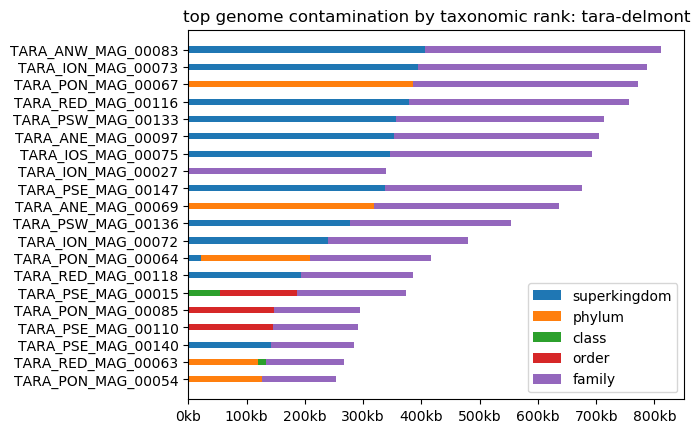

In [57]:
_ = plot_hitlist('output.tara-delmont/hit_list_for_filtering.csv', num=20)

[      0.  200000.  400000.  600000.  800000. 1000000. 1200000.]
['0kb', '200kb', '400kb', '600kb', '800kb', '1000kb', '1200kb']


<Figure size 640x480 with 0 Axes>

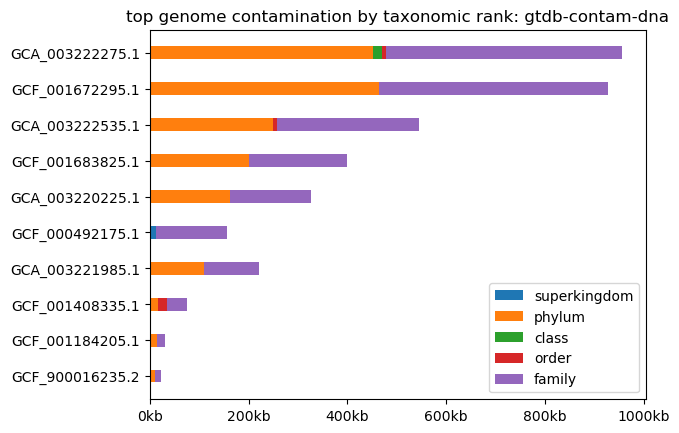

In [58]:
_ = plot_hitlist('output.gtdb-contam-dna/hit_list_for_filtering.csv')